In [1]:
import os
import os.path
import numpy as np
import matplotlib.pyplot as plt
import mne
import pandas as pd
from scipy import stats

In [2]:
#Path des fichiers csv
folder_path ='/Users/FlorianLudwig/Desktop/workshop_eeg/trust-eeg/'

trust_temp_file_path=folder_path+'trust_temp_fast.csv'
distrust_temp_file_path=folder_path+'distrust_temp_fast.csv'
betrayal_temp_file_path=folder_path+'betrayal_temp_fast.csv'

#Transformation des csv en pandas dataframe
df_trust_temp = pd.read_csv(trust_temp_file_path)
df_distrust_temp = pd.read_csv(distrust_temp_file_path)
df_betrayal_temp = pd.read_csv(betrayal_temp_file_path)

#Transformation du pandas dataframe en numpy array
trust_temp = df_trust_temp.to_numpy()
distrust_temp = df_distrust_temp.to_numpy()
betrayal_temp = df_betrayal_temp.to_numpy()

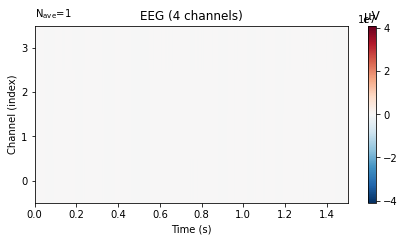

In [28]:
trust_TF_file_path=folder_path+'trust_TF_fast.csv'
df_trust_TF = pd.read_csv(trust_temp_file_path)
trust_TF = df_trust_temp.to_numpy()
trust_TF_sub = np.array_split(trust_TF, 20)
trust_TF_mat = np.stack((trust_TF_sub),axis=0)
trust_TF_avg = trust_temp_sub_mat.mean(axis=0)
trust_TF_evoked = mne.EvokedArray(trust_TF_avg, info)
trust_TF_evoked.plot_image();

In [3]:
print(trust_temp.shape)
print(distrust_temp.shape)
print(betrayal_temp.shape)
print(trust_temp[59].size)

(80, 1502)
(80, 1502)
(80, 1502)
1502


In [5]:
#Construction du Cube Trust
trust_temp_sub = np.array_split(trust_temp, 20)
trust_temp_sub_mat = np.stack((trust_temp_sub),axis=0)
print('Trust Cube stats: '+str(trust_temp_sub_mat.shape))

#Construction du Cube Betrayal
betrayal_temp_sub = np.array_split(betrayal_temp, 20)
betrayal_temp_sub_mat = np.stack((betrayal_temp_sub),axis=0)
print(betrayal_temp_sub_mat.shape)



Trust Cube stats: (20, 4, 1502)
(20, 4, 1502)


(20, 4, 1502)
Mean for participants pour Evoked: (4, 1502)


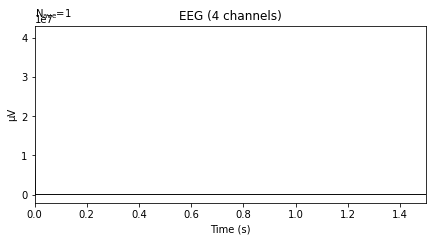

In [9]:
#Construction d'une info pour l'evoked
ch_names = ['Oz','Cz','Fz','Pz']
sfreq = 1000
info = mne.create_info(ch_names, sfreq, ch_types='eeg', verbose=None)

print(trust_temp_sub_mat.shape)
#Construction de l'evoked pour l'image moyenne
trust_temp_sub_mat_avg = trust_temp_sub_mat.mean(axis=0)
print('Mean for participants pour Evoked: '+ str(trust_temp_sub_mat_avg.shape))

#Conversion en Evoked Temporels
trust_temp_sub_mat_evoked = mne.EvokedArray(trust_temp_sub_mat_avg, info) 
"betrayal_evoked = mne.EvokedArray(betrayal_temp,info)";
trust_temp_sub_mat_evoked.plot();

In [17]:
#Découpage de la zone d'intérêt
trust_temp_sub_mat_crop = trust_temp_sub_mat[:,:,625:675]
print('Shape après crop: ' + str(trust_temp_sub_mat_crop.shape))
betrayal_temp_sub_mat_crop = betrayal_temp_sub_mat[:,:,625:675]

#Moyenne du signal sur la zone d'intérêt
trust_temp_sub_mat_avg = trust_temp_sub_mat_crop.mean(axis=2)
print(('Shape après moyenne: '+ str(trust_temp_sub_mat_avg.shape)))
betrayal_temp_sub_mat_avg = betrayal_temp_sub_mat_crop.mean(axis=2)

#Découpage par chaîne Oz
ERP_Oz_Trust = trust_temp_sub_mat_avg[:,0]
print('Shape pour une seule chaîne: ' + str(trust_temp_sub_mat_avg[:,0].shape))
ERP_Oz_Betrayal = betrayal_temp_sub_mat_avg[:,0]

#Même procédure pour Cz, Fz, Pz
ERP_Cz_Trust = trust_temp_sub_mat_avg[:,1]
ERP_Fz_Trust = trust_temp_sub_mat_avg[:,2]
ERP_Pz_Trust = trust_temp_sub_mat_avg[:,3]

ERP_Cz_Betrayal = betrayal_temp_sub_mat_avg[:,1]
ERP_Fz_Betrayal = betrayal_temp_sub_mat_avg[:,2]
ERP_Pz_Betrayal = betrayal_temp_sub_mat_avg[:,3]

Shape après crop: (20, 4, 50)
Shape après moyenne: (20, 4)
Shape pour une seule chaîne: (20,)


In [18]:
print("This is a test for the null hypothesis that two related or repeated samples have identical average.\n")

#Find T critical value - Right tailed
df = ERP_Pz_Betrayal.size - 1
print("n-1 = " + str(df)+"\n")
print("T-critical Value: " + str(stats.t.ppf(q=1-.05,df=df)))

print("\nIf the absolute value of the t-value is greater than the critical value, you reject the null hypothesis. \nIf the absolute value of the t-value is less than the critical value, you fail to reject the null hypothesis.\n")

print("T-test Oz: " + str(stats.ttest_rel(ERP_Oz_Betrayal,ERP_Oz_Trust)))
print("T-test Oz: " + str(stats.ttest_rel(ERP_Oz_Trust,ERP_Oz_Betrayal)))
#print(stats.ttest_ind(ERP_Oz_Trust, ERP_0z_Betrayal))
print("\nT-test Cz: " + str(stats.ttest_rel(ERP_Cz_Betrayal,ERP_Cz_Trust)))
print("\nT-test Fz: " + str(stats.ttest_rel(ERP_Fz_Betrayal, ERP_Fz_Trust)))
print("\nT-test Pz: " + str(stats.ttest_rel(ERP_Pz_Betrayal, ERP_Pz_Trust)))

This is a test for the null hypothesis that two related or repeated samples have identical average.

n-1 = 19

T-critical Value: 1.729132811521367

If the absolute value of the t-value is greater than the critical value, you reject the null hypothesis. 
If the absolute value of the t-value is less than the critical value, you fail to reject the null hypothesis.

T-test Oz: Ttest_relResult(statistic=-0.5337703768097866, pvalue=0.5996902017251291)
T-test Oz: Ttest_relResult(statistic=0.5337703768097866, pvalue=0.5996902017251291)

T-test Cz: Ttest_relResult(statistic=-0.6462173570079401, pvalue=0.5258678990811574)

T-test Fz: Ttest_relResult(statistic=-0.3175836154104126, pvalue=0.7542645174083888)

T-test Pz: Ttest_relResult(statistic=0.4212656906254918, pvalue=0.6782883686720781)
